Remove the '#' in the following line to install the pyMelt package. You'll need this for some of the calculations later in this lab

In [1]:
#!pip install pyMelt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import pyMelt as m

m.__version__

'0.5.1'

# Extra Credit - the link between mantle potential temperature and magma chemistry

The chemical systematics/composition of basaltic magmas erupted at mid-ocean ridges are consistent with those expected from melting of a lherzolitic mantle at <2 GPa, accounting for some influence of fractional crystallisation as these magmas are stored in the crust. However, the composition of the primary mid-ocean ridge magmas is not fixed. Globally, and on a segment-by-segment basis, there are systematic variations in magma chemistry that correlate with geophysical observables (e.g., ridge depth, crustal thickness, spreading rate etc.).

To compare primary melts from different ridge segments, researchers often try to 'correct' for the influence of fractional crystallisation by calculating the composition of magmas at a fixed MgO value (usually 8 wt%). This is done by either simple linear regression, or more complex 'reverse crystallisation' modelling. An example of these calculations to determine the Na$_8$ value of basalts from the Rekyjanes Ridge (S. of Iceland) is shown below. 

**Correction of mid-ocean ridge basalt compositions to 8 wt% MgO. The red lines show the linear regression through the data with <8 wt% MgO, samples with low MgO contents are corrected back to 8 wt% MgO by moving them parallel to this line (see Shorttle et al. 2015 for details)**

![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S0012821X15004446-gr012.jpg)

One of the most interesting observations that comes from these corrections is that the Na content of mid-ocean ridge basalts at 8 wt% MgO is correlated with the thickness of the crust (see image below). In this 'homework' you'll try and work out why this might be the case!

To do so, we're going to be using a simple bit of Python3 code that calls on a package called pyMelt. pyMelt was designed to simulate the process of adiabatic decompression melting. It has several in built calculations that allow the user to calculate the thickness of oceanic crust produced by mantle melting, and the trace element composition of the melts that are produced by this process.

In the following calculations, we'll treat Na as a trace element (it isn't a major component of olivine, orthopyroxene, clinopyroxene, spinel or garnet so this is a reasonable assumption for mantle melting models). Using the pyMelt code, we can vary several parameters in the melting calculations, including the mantle potential temperature and the mantle water content, and see how these influence the crustal thickness.

Ultimately, the question we're trying to answer here is: Can changes in mantle potential temperature explain the Na$_{8}$ - Crustal Thickness/Ridge Depth correlation?

![alt text](https://player.slideplayer.com/26/8821929/data/images/img12.jpg)
![alt text](https://player.slideplayer.com/26/8821929/data/images/img13.jpg)

So, lets see if we can re-create this correlation using some mantle melting models.

The first thing pyMelt requires is that you specify what lithology (type of mantle rock) you want to model the melting behaviour of and specify the proportion of that lithology in your mantle (this code can be used to model a multi-component mantle). We will be using lherzolite as it forms the dominant portion of the Earth's upper mantle.

In [3]:
# lherzolite lithology is saved in pyMelt as klb1()
lz = m.lithologies.matthews.klb1()

# define the mantle as 100% lherzolite - likely a reasonable assumption for mid-ocean ridge systems.
mantle = m.mantle([lz], [1], ['Lz']) # this just tells the code that our model mantle is 100% composed of lherzolite.


Now that we have set up our mantle, we can start to think about how it melts. Luckily, pyMelt has information about the mantle solidus already included within the base code. Therefore, to calculate the depth of extent of melting, all we need is one more line of code. For this example calculation we use a mantle potential temperature (Tp) of 1350$^o$C.

In [4]:
column = mantle.adiabaticMelt(Tp = 1350)

We can look a the results of this calculation using another in-built pyMelt function.

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


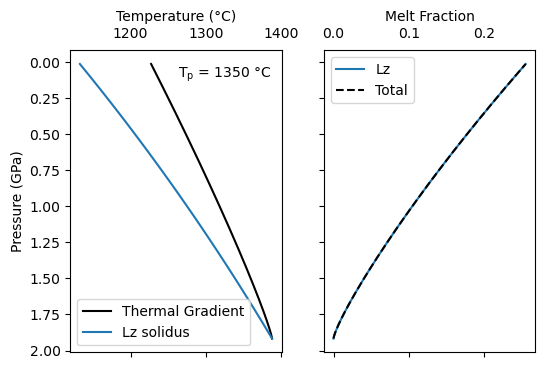

In [5]:
f, a = column.plot()

While this plot is nice, it doesn't really tell us much other than melting starts around 2 GPa, and reaches a maximum melt extent of ~0.25.

To get information about the thickness of crust produced by mantle melting, and the chemistry of the melts, we have to do a bit more work (sorry)!

To get the crustal thickness, we need to solve the following equation:

$$ t_{c} = \frac{1}{g\rho_{c}} \int_{P_{start}}^{P_{crust}} \frac{\sum{F(P)}}{1 - \sum{F(P)}} dP $$

where $t_c$ is the crustal thickness (in km), $g$ is gravitational acceleration, $\rho_c$ represents the density of basaltic melt (i.e. the density of the crust), $P_{start}$ and $P_{crust}$ represent the pressure at which melting starts and stops (this stop point is solved iteratively as it will be deeper for regions with thicker crust). $F(P)$ is the melt fraction at each pressure in the melt column.

**Luckily for us all, pyMelt can do this calculation for us. All we need to do is tell the code that we are looking at a mid-ocean ridge setting and it will automatically calculate crustal thickness.**

In [6]:
morb = m.geosettings.spreadingCentre(column)
morb.tc

6.278513349248948

Here we see that for this case, we have a crustal thickness of ~6.3 km when the mantle potential temperture was set at 1350$^oC$. This is pretty typical for most mid-ocean ridge systems worldwide. Using the graphs above, approximately what $Na_{8.0}$ value would you expect for a ridge with this crustal thickness?

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

Now, we can think about actually calculating the $Na_{8.0}$ value, but first, we need to give pyMelt a bit of information.

Specifically, we need to tell pyMelt the amount of Na that is in the mantle (lets use the value of 0.13 wt%), and the bulk partition coefficient of Na (see lectures 4 and 5 for explanation of element partitioning). For the purposes of this calculation, we will assume a partition coefficient of Na between the solid mantle and basaltic melts of 0.05 (i.e., there is ~20 times more Na in the melt than in the mantle residue).

**These are approximate values, taken from the work of Workman and Hart (2005) amongst others. In reality, the partitioning of Na is controlled by pressure, temperature etc.**

In [7]:
Na_mantle = 0.13 # wt%
D_Na = 0.02 #Conc in melt divided by Conc in solid.

# set up a chemistry 'species' for pyMelt - this helps pyMelt 'read' the chemistry of the mantle.
species = m.chemistry.continuousSpecies_instantaneous('Na', Na_mantle, D_Na)

We can now calculate the composition of melts produced in our melt column using the following code:

In [8]:
column.calculateChemistry(species_objects = {'Lz' :[species]})

Re-running the code specifying we are looking at a morb will now tell us to approximate Na content of melts produced by mantle melting at $T_p = 1350^oC$.

In [9]:
morb = m.geosettings.spreadingCentre(column)
morb.chemistry

Na    0.941978
dtype: float64

The calculated Na content is given in wt% Na. The graph of $Na_{8.0}$ above is actually giving the Na contents in wt% of Na$_2$O (i.e., sodium oxide). Therefore the Na content predicted by pyMelt actually needs to be converted into an oxide wt% value before it can be compared to the graphs shown above.

This is done by dividing by the molar mass of Na, and multiplying the result by the molar mass of Na$_2$O.

$$ \frac{0.94\ wt\%\ Na }{22.99}*61.98 = 2.53\ wt\%\ Na_2O $$

Compare this calculated Na$_2$O content to the $Na_{8.0}$ value you estimated above based on the crustal thickness. Do they match?

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

What you should observe is that this calculated Na$_2$O value lies on the lower Na$_2$O side of the Na$_2$O vs crustal thickness correlation. This is to be expected as the Na$_{8.0}$ values are still influenced by small amounts of fractional crystallisation.

What I'd like for you to do in this extra credit 'homework'. Is to read the first 5 pages of the Langmuir & Forsyth (2005) paper on bcourses (check in the Modules tab), and then use the following code to create a plot of modelled crustal thickness vs Na$_2$O contents.

Your plot should cover crustal thicknesses ranging from 20 to 4 km and should be accompanied by a brief discussion of why there is a correlation between these two parameters and the role that mantle potential temperatures play in determining basalt chemistry.

In [11]:
# we'll run through the code again all in one cell so you can run it multiple times.
# First lets set up our lherzolite mantle.
lz = m.lithologies.matthews.klb1()
mantle = m.mantle([lz], [1], ['Lz'])

# then, lets set the mantle potential temperature and run the melting calculations
Tp = 1350 #oC
column = mantle.adiabaticMelt(Tp)

# next, we can set the Na parameters for the chemistry calculations.
Na_mantle = 0.13 # wt%
D_Na = 0.02 #Conc in melt divided by Conc in solid.

species = m.chemistry.continuousSpecies_instantaneous('Na', Na_mantle, D_Na)
column.calculateChemistry(species_objects = {'Lz' :[species]})

# finally we carry out the calculations to turn these melting calculations into numbers relevant to mid-ocean ridges
morb = m.geosettings.spreadingCentre(column)

# convert Na wt% to Na2O wt%
Na2O = 61.98*morb.chemistry['Na']/22.99

# and finally print the results.
print(str(round(morb.tc,2)) + ' km')
print(str(round(Na2O, 2)) + ' wt%')

6.28 km
2.54 wt%
